<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/AI_USEAGE_IN_CYBERSECURITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install scikit-learn pandas


In [2]:
# Import libraries
import pandas as pd

# Load the dataset (NSL-KDD dataset example)
url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt"

# Define column names for the dataset
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
           'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
           'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
           'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
           'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
           'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

# Load data into a pandas DataFrame
data = pd.read_csv(url, names=columns)
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
# Convert the labels to binary (normal or attack)
data['label'] = data['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Split the dataset into features (X) and label (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'tcp'

In [6]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']

# Create LabelEncoder objects for each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    # Handle unknown categories in test set by using .transform with try/except
    try:
        X_test[col] = label_encoders[col].transform(X_test[col])
    except ValueError:
        # For unknown categories, use '-1' or another default value
        X_test[col] = X_test[col].apply(lambda x: -1 if x not in label_encoders[col].classes_ else label_encoders[col].transform([x])[0])


In [7]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'tcp'

In [8]:
# Check for any non-numeric columns
print(X_train.dtypes)

# Check for any missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())


duration                        object
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

In [9]:
# Check for any non-numeric columns
print(X_train.dtypes)

# Check for any missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())


duration                        object
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

In [10]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [11]:
# Check for any non-numeric columns or missing values
print(X_train.dtypes)
print(X_train.isnull().sum())

# Fill missing values and convert to numeric if needed
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure all values are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Train the model again
model.fit(X_train, y_train)


duration                       float64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

RandomForestClassifier(random_state=42)

In [12]:
# Predict on the test data
y_pred = model.predict(X_test)

# Import metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     37792

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



In [13]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the average cross-validation score
print(f"Average Cross-Validation Score: {cross_val_scores.mean()}")


Average Cross-Validation Score: 1.0


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Perform cross-validation
logreg_cross_val = cross_val_score(logreg_model, X_train, y_train, cv=5)

# Print the average cross-validation score
print(f"Logistic Regression Cross-Validation Score: {logreg_cross_val.mean()}")


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [16]:
# prompt: PLZ FIX ERROR OR LAST PORMPT

# ... (previous code) ...

# Train the model again
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Import metrics for evaluation

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the average cross-validation score
print(f"Average Cross-Validation Score: {cross_val_scores.mean()}")


# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Perform cross-validation
logreg_cross_val = cross_val_score(logreg_model, X_train, y_train, cv=5)

# Print the average cross-validation score
print(f"Logistic Regression Cross-Validation Score: {logreg_cross_val.mean()}")


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     37792

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792

Average Cross-Validation Score: 1.0


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [17]:
# prompt: PLZ FIX ERROR OF cell line: 32

# ... (previous code) ...

# Select categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']

# Create LabelEncoder objects for each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    # Handle unknown categories in test set by using .transform with try/except
    try:
        X_test[col] = label_encoders[col].transform(X_test[col])
    except ValueError:
        # For unknown categories, use '-1' or another default value
        X_test[col] = X_test[col].apply(lambda x: -1 if x not in label_encoders[col].classes_ else label_encoders[col].transform([x])[0])

# ... (rest of the code) ...


In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate using the best model
best_model = grid_search.best_estimator_
best_cross_val = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Best Random Forest Cross-Validation Score: {best_cross_val.mean()}")


Best parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Cross-Validation Score: 1.0


In [19]:
# Check feature importance
feature_importances = best_model.feature_importances_
for name, importance in zip(X_train.columns, feature_importances):
    print(f"Feature: {name}, Importance: {importance}")


Feature: duration, Importance: 0.0
Feature: protocol_type, Importance: 0.0
Feature: service, Importance: 0.0
Feature: flag, Importance: 0.0
Feature: src_bytes, Importance: 0.0
Feature: dst_bytes, Importance: 0.0
Feature: land, Importance: 0.0
Feature: wrong_fragment, Importance: 0.0
Feature: urgent, Importance: 0.0
Feature: hot, Importance: 0.0
Feature: num_failed_logins, Importance: 0.0
Feature: logged_in, Importance: 0.0
Feature: num_compromised, Importance: 0.0
Feature: root_shell, Importance: 0.0
Feature: su_attempted, Importance: 0.0
Feature: num_root, Importance: 0.0
Feature: num_file_creations, Importance: 0.0
Feature: num_shells, Importance: 0.0
Feature: num_access_files, Importance: 0.0
Feature: num_outbound_cmds, Importance: 0.0
Feature: is_host_login, Importance: 0.0
Feature: is_guest_login, Importance: 0.0
Feature: count, Importance: 0.0
Feature: srv_count, Importance: 0.0
Feature: serror_rate, Importance: 0.0
Feature: srv_serror_rate, Importance: 0.0
Feature: rerror_rate, 

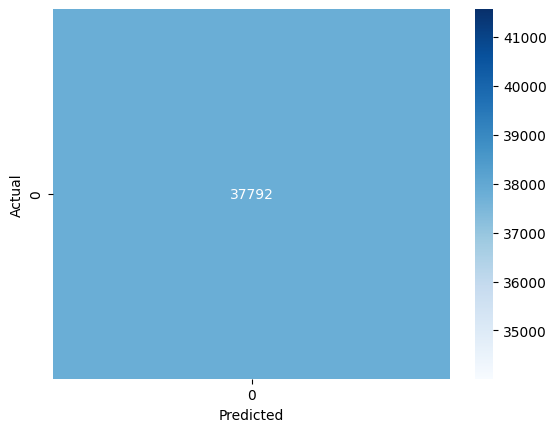

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [21]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [22]:
# prompt: PLZ FIX ERROR OF cell line: 4 OF LAST PROMPT

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Install necessary libraries
!pip install scikit-learn pandas

# Import libraries

# Load the dataset (NSL-KDD dataset example)
url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt"

# Define column names for the dataset
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
           'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
           'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
           'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
           'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
           'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

# Load data into a pandas DataFrame
data = pd.read_csv(url, names=columns)
data.head()

# Convert the labels to binary (normal or attack)
data['label'] = data['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Split the dataset into features (X) and label (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']

# Create LabelEncoder objects for each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    # Handle unknown categories in test set by using .transform with try/except
    try:
        X_test[col] = label_encoders[col].transform(X_test[col])
    except ValueError:
        # For unknown categories, use '-1' or another default value
        X_test[col] = X_test[col].apply(lambda x: -1 if x not in label_encoders[col].classes_ else label_encoders[col].transform([x])[0])

# Check for any non-numeric columns
print(X_train.dtypes)

# Check for any missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check for any non-numeric columns
print(X_train.dtypes)

# Check for any missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check for any non-numeric columns or missing values
print(X_train.dtypes)
print(X_train.isnull().sum())

# Fill missing values and convert to numeric if needed
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure all values are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the average cross-validation score
print(f"Average Cross-Validation Score: {cross_val_scores.mean()}")


# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Perform cross-validation
logreg_cross_val = cross_val_score(logreg_model, X_train, y_train, cv=5)

# Print the average cross-validation score
print(f"Logistic Regression Cross-Validation Score: {logreg_cross_val.mean()}")


# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate using the best model
best_model = grid_search.best_estimator_
best_cross_val = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Best Random Forest Cross-Validation Score: {best_cross_val.mean()}")

# Check feature importance
feature_importances = best_model.feature_importances_
for name, importance in zip(X_train.columns, feature_importances):
    print(f"Feature: {name}, Importance: {importance}")


# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")


duration                        object
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [23]:
# prompt: PLZ FIX ERROR OF cell line: 119 IN LAST PROMPT

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Install necessary libraries
!pip install scikit-learn pandas

# Import libraries

# Load the dataset (NSL-KDD dataset example)
url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt"

# Define column names for the dataset
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
           'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
           'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
           'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
           'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
           'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

# Load data into a pandas DataFrame
data = pd.read_csv(url, names=columns)
data.head()

# Convert the labels to binary (normal or attack)
data['label'] = data['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Split the dataset into features (X) and label (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']

# Create LabelEncoder objects for each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    # Handle unknown categories in test set by using .transform with try/except
    try:
        X_test[col] = label_encoders[col].transform(X_test[col])
    except ValueError:
        # For unknown categories, use '-1' or another default value
        X_test[col] = X_test[col].apply(lambda x: -1 if x not in label_encoders[col].classes_ else label_encoders[col].transform([x])[0])

# Check for any non-numeric columns
print(X_train.dtypes)

# Check for any missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check for any non-numeric columns
print(X_train.dtypes)

# Check for any missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check for any non-numeric columns or missing values
print(X_train.dtypes)
print(X_train.isnull().sum())

# Fill missing values and convert to numeric if needed
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure all values are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the average cross-validation score
print(f"Average Cross-Validation Score: {cross_val_scores.mean()}")


# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Perform cross-validation
logreg_cross_val = cross_val_score(logreg_model, X_train, y_train, cv=5)

# Print the average cross-validation score
print(f"Logistic Regression Cross-Validation Score: {logreg_cross_val.mean()}")


# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate using the best model
best_model = grid_search.best_estimator_
best_cross_val = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Best Random Forest Cross-Validation Score: {best_cross_val.mean()}")

# Check feature importance
feature_importances = best_model.feature_importances_
for name, importance in zip(X_train.columns, feature_importances):
    print(f"Feature: {name}, Importance: {importance}")


# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")


duration                        object
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [24]:
# Check the class distribution in y_train and y_test
print("Class distribution in y_train:")
print(y_train.value_counts())

print("Class distribution in y_test:")
print(y_test.value_counts())


Class distribution in y_train:
label
1    88181
Name: count, dtype: int64
Class distribution in y_test:
label
1    37792
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
